In [58]:
import tensorflow as tf
import os

In [59]:
os.path.join('data', 'happy')
os.listdir('data')

['happy', 'sad']

In [60]:
# Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [61]:
data_dir = 'data'

In [62]:
image_exts = ['jpeg','jpg','bmp','png']

In [63]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))
img.shape

(3844, 5125, 3)

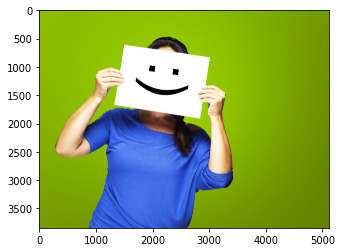

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
        

In [9]:
# Load data
tf.data.Dataset??

In [10]:
import numpy as np

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 258 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
data_iterator

In [14]:
# Get another batch from the iterator
batch = data_iterator.next()

In [15]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
# Class 1 = Sad People
# Class 0 = Happy People 
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

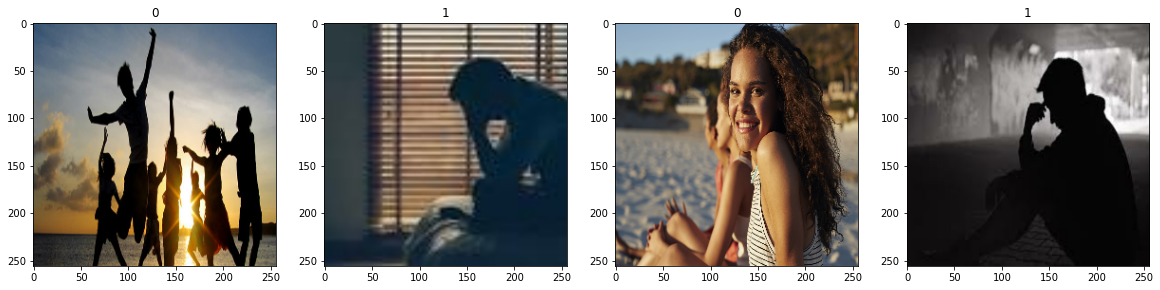

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# Preprocess Data
# Scale data
data = data.map(lambda x, y: (x/225, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
scaled_iterator = data.as_numpy_iterator()


In [20]:
scaled_iterator

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].min()

0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


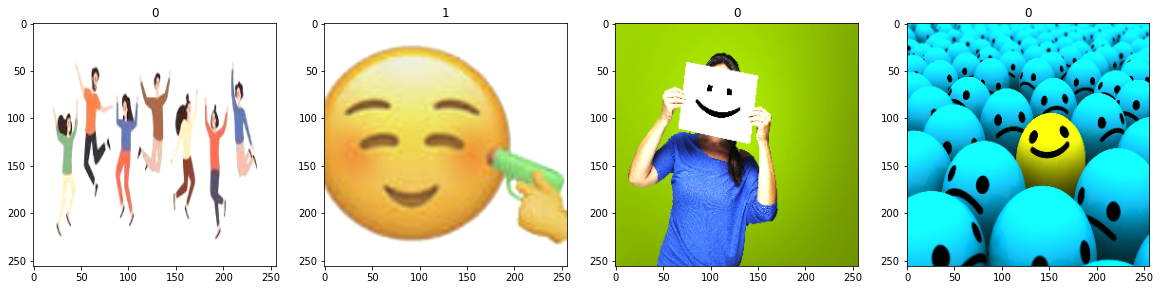

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
# Split data
len(data)

9

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
train_size + val_size + test_size

9

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [28]:
# Build Deep learning model
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [30]:

model = Sequential()

In [31]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [33]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [34]:
# Train

logdir='logs'

In [35]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:

hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6/6 [==============================] - 4s 507ms/step - loss: 2.8607 - accuracy: 0.4844 - val_loss: 0.6889 - val_accuracy: 0.6094
Epoch 2/20
6/6 [==============================] - 3s 492ms/step - loss: 0.6891 - accuracy: 0.4948 - val_loss: 0.6757 - val_accuracy: 0.5469
Epoch 3/20
6/6 [==============================] - 3s 496ms/step - loss: 0.6801 - accuracy: 0.5156 - val_loss: 0.6792 - val_accuracy: 0.4531
Epoch 4/20
6/6 [==============================] - 3s 474ms/step - loss: 0.6661 - accuracy: 0.6302 - val_loss: 0.6483 - val_accuracy: 0.5938
Epoch 5/20
6/6 [==============================] - 3s 487ms/step - loss: 0.6510 - accuracy: 0.5625 - val_loss: 0.6352 - val_accuracy: 0.8125
Epoch 6/20
6/6 [==============================] - 3s 477ms/step - loss: 0.6336 - accuracy: 0.6615 - val_loss: 0.5439 - val_accuracy: 0.7188
Epoch 7/20
6/6 [==============================] - 3s 481ms/step - loss: 0.6309 - accuracy: 0.6250 - val_loss: 0.5947 - val_accuracy: 0.7500
Epoch 8/20
6/6 [====

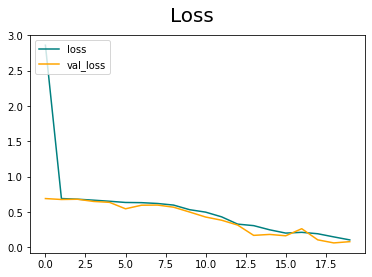

In [37]:
# Plot Performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

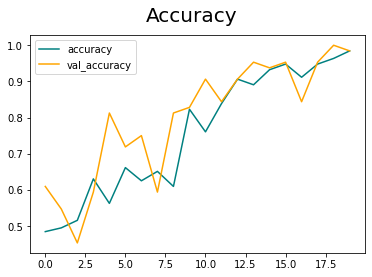

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [40]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 60ms/step


In [42]:

print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [43]:
#Test
import cv2

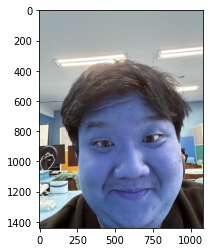

In [53]:

img = cv2.imread('koko.jpeg')
plt.imshow(img)
plt.show()

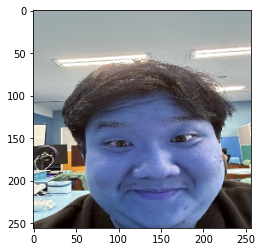

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 15ms/step


In [56]:
yhat

array([[0.21185738]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [49]:
# Save the model

from tensorflow.keras.models import load_model


In [50]:
model.save(os.path.join('models','imageclassifier.h5'))

In [51]:
new_model = load_model('models/imageclassifier.h5')

In [52]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 49ms/step


array([[0.8622293]], dtype=float32)